<a href="https://colab.research.google.com/github/Chutki319239/msazure/blob/main/Handwritten_Digit_Recognition_on_MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Handwritten Digit Recognition on MNIST dataset**

## **Fetching Dataset**

In [38]:
from sklearn.datasets import fetch_openml

In [39]:
mnist=fetch_openml('mnist_784')

In [40]:
x,y=mnist['data'],mnist['target']

In [41]:
x.shape

(70000, 784)

In [42]:
y.shape


(70000,)

In [43]:
%matplotlib inline

In [44]:
import matplotlib
import matplotlib.pyplot as plt

In [45]:
some_digit = x.iloc[3601]
some_digit_image = some_digit.values.reshape(28,28)

(-0.5, 27.5, 27.5, -0.5)

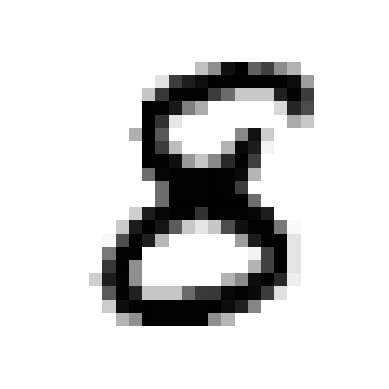

In [46]:
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary,interpolation='nearest')
plt.axis('off')

In [47]:
y[3601]

'8'

In [48]:
x_train,x_test=x[:6000],x[6000:7000]

In [49]:
y_train,y_test=y[:6000],y[6000:7000]

In [50]:
import numpy as np
shuffle_index=np.random.permutation(6000)
x_train,y_train=x_train.iloc[shuffle_index],y_train.iloc[shuffle_index]


## **Creating a 2 detector**

In [51]:
y_train=y_train.astype(np.int8)
y_test=y_test.astype(np.int8)
y_train_2=(y_train==2)
y_test_2=(y_test==2)

In [52]:
y_test_2

,class
6000,False
6001,False
6002,False
6003,False
6004,False
...,...
6995,False
6996,False
6997,False
6998,False


In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
clf = LogisticRegression(tol=0.1)

In [55]:
clf.fit(x_train,y_train_2)

LogisticRegression(tol=0.1)

In [56]:
clf.predict([some_digit])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([False])

In [59]:
from sklearn.model_selection import cross_val_score
a=cross_val_score(clf,x_train,y_train_2,cv=3,scoring="accuracy")

In [60]:
a.mean()

0.9575